In [1]:
#Dependencies
import os
import csv

# Data Manupulation
import numpy as np
import pandas as pd

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Data fetching
#from pandas_datareader import data as pdr


In [2]:
#Getting data
df = pd.read_csv("Resources\\voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
#Check the length of the dataset
len(df)

3168

In [4]:
# Assign X (data) and y (target)
X = df.drop("label", axis=1)
y = df["label"]
print(X.shape, y.shape)

#target = df["Outcome"]
#target_names = ["negative", "positive"]

(3168, 20) (3168,)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

#data = df.drop("Outcome", axis=1)
#feature_names = data.columns
#data.head()

In [6]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 1.000/0.718
k: 3, Train/Test Score: 0.841/0.735
k: 5, Train/Test Score: 0.797/0.731
k: 7, Train/Test Score: 0.774/0.720
k: 9, Train/Test Score: 0.764/0.702
k: 11, Train/Test Score: 0.752/0.694
k: 13, Train/Test Score: 0.745/0.694
k: 15, Train/Test Score: 0.746/0.697
k: 17, Train/Test Score: 0.739/0.703
k: 19, Train/Test Score: 0.729/0.698
k: 21, Train/Test Score: 0.726/0.702
k: 23, Train/Test Score: 0.729/0.710
k: 25, Train/Test Score: 0.722/0.694
k: 27, Train/Test Score: 0.718/0.692
k: 29, Train/Test Score: 0.716/0.689
k: 31, Train/Test Score: 0.716/0.693
k: 33, Train/Test Score: 0.712/0.693
k: 35, Train/Test Score: 0.710/0.698
k: 37, Train/Test Score: 0.708/0.697
k: 39, Train/Test Score: 0.709/0.701
k: 41, Train/Test Score: 0.706/0.699
k: 43, Train/Test Score: 0.708/0.697
k: 45, Train/Test Score: 0.710/0.696
k: 47, Train/Test Score: 0.707/0.692
k: 49, Train/Test Score: 0.702/0.691
k: 51, Train/Test Score: 0.703/0.692
k: 53, Train/Test Score: 0.701/0.686
k: 55,

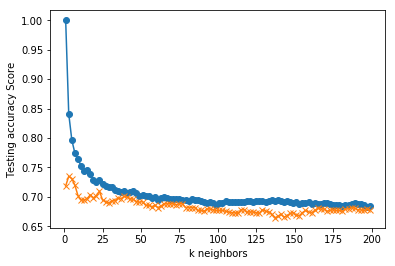

In [12]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 200, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 200, 2), train_scores, marker='o')
plt.plot(range(1, 200, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [11]:
# Note that k: 3 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test, y_test))

k=3 Test Acc: 0.735


In [ ]:
#calculate MSE